<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

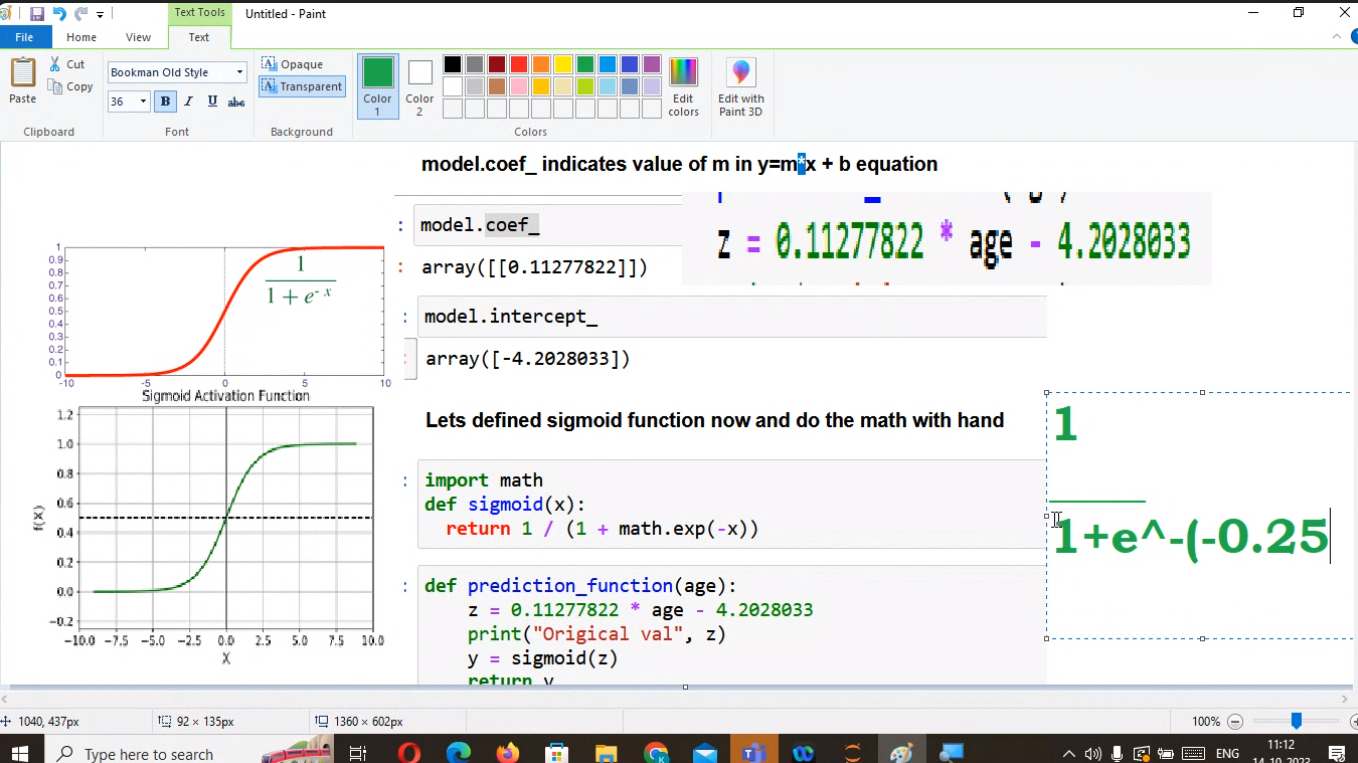

In [ ]:
pwd

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


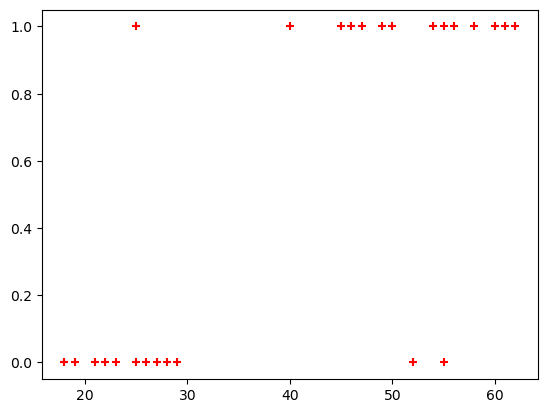

In [49]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.2, random_state=10)

In [52]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [56]:
X_test.shape

(6, 1)

In [75]:
y_predicted = model.predict(X_test)

In [76]:
print(y_predicted)

[1 1 0 0 0 0]


In [77]:
model.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [78]:
model.score(X_test,y_test)

1.0

In [79]:
y_predicted

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [80]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


**model.coef_ indicates value of m in y=m*x + b equation**

In [81]:
model.coef_

array([[0.11277822]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [82]:
model.intercept_

array([-4.2028033])

**Lets defined sigmoid function now and do the math with hand**

In [83]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [87]:
def prediction_function(age):
    z = 0.11277822 * age - 4.2028033 
    print("Origical val", z)
    y = sigmoid(z)
    return y

In [94]:
age = 35
prediction_function(age)

Origical val -0.25556560000000017


0.4364540926806563

In [90]:
age = 55
prediction_function(age)

Origical val 1.9999987999999993


0.8807969519855223

In [71]:
age = 40
prediction_function(age)

0.5764764821440581

In [72]:
# Get the order of classes
class_order = model.classes_
print("Class Order:", class_order)

Class Order: [0 1]


In [73]:
# Create a DataFrame with age values
ages = [47, 18, 12, 99, 86]
new_test = pd.DataFrame({'Age': ages})

# Apply the prediction_function to each age value
new_test['Prediction'] = new_test['Age'].apply(prediction_function)

# Print the DataFrame
print(new_test)

   Age  Prediction
0   47    0.749843
1   18    0.102220
2   12    0.054709
3   99    0.999054
4   86    0.995914


In [74]:
labels = model.predict(new_test[['Age']])

# Print the labels
print(labels)

[1 0 0 1 1]


C:\Users\SevenMentor\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)
